# Understanding Pandas Series and DataFrames - Lab

## Introduction

In this lab, let's get some hands on practice working with data cleanup using Pandas.

## Objectives
You will be able to:

* Manipulate columns in DataFrames (df.rename, df.drop)
* Manipulate the index in DataFrames (df.reindex, df.drop, df.rename)
* Manipulate column datatypes

## Let's get started!

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('turnstile_180901.txt')
print(len(df))
df.head()

197625


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


## Rename all the columns to lower case

In [7]:
lower_cols = list(map(lambda x : x.lower(), df.columns))

lower_cols

['c/a',
 'unit',
 'scp',
 'station',
 'linename',
 'division',
 'date',
 'time',
 'desc',
 'entries',
 'exits                                                               ']

## Change the Index to be the Line Names

In [8]:
df = df.set_index('LINENAME')
df.head()

,C/A,UNIT,SCP,STATION,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
LINENAME,,,,,,,,,,
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


# Change the index back

In [20]:
df = df.reset_index()
df.head(7)

,level_0,index,LINENAME,C/A,UNIT,SCP,STATION,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,Num_Lines
0,0,0,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184,7
1,1,1,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188,7
2,2,2,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229,7
3,3,3,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314,7
4,4,4,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384,7
5,5,5,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,20:00:00,REGULAR,6736562,2283425,7
6,6,6,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/26/2018,00:00:00,REGULAR,6736683,2283460,7


## Create another column 'Num_Lines' that is a count of how many lines pass through a station. Then sort your dataframe by this column in descending order
*Hint: According to the [data dictionary](http://web.mta.info/developers/resources/nyct/turnstile/ts_Field_Description.txt), LINENAME represents all train lines that can be boarded at a given station. Normally lines are represented by one character. For example, LINENAME 456NQR represents trains 4, 5, 6, N, Q, and R.*

In [46]:
df['Num_Lines'] = list(map(lambda x : len(x), df.Linename))

df.sort_values(by=['Num_Lines'], ascending=False)

df.head(35)

,Level_0,Index,Linename,C/A,Unit,Scp,Station,Division,Date,Time,Desc,Entries,Exits,Num_Lines,Day_of_week
0,0,0,NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-25,00:00:00,REGULAR,6736067,2283184,7,5
1,1,1,NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-25,04:00:00,REGULAR,6736087,2283188,7,5
2,2,2,NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-25,08:00:00,REGULAR,6736105,2283229,7,5
3,3,3,NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-25,12:00:00,REGULAR,6736180,2283314,7,5
4,4,4,NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-25,16:00:00,REGULAR,6736349,2283384,7,5
5,5,5,NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-25,20:00:00,REGULAR,6736562,2283425,7,5
6,6,6,NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-26,00:00:00,REGULAR,6736683,2283460,7,6
7,7,7,NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-26,04:00:00,REGULAR,6736696,2283461,7,6
8,8,8,NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-26,08:00:00,REGULAR,6736705,2283483,7,6
9,9,9,NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-26,12:00:00,REGULAR,6736746,2283524,7,6


## Write a function to clean a column name

In [69]:
def clean(col_name):
    cleaned = col_name.strip(' ')
    return cleaned

In [70]:
#This is a list comprehension. It applies your clean function to every item in the list.
#We then reassign that to df.columns
#You shouldn't have to change anything here.
#Your function above should work appropriately here.
df.columns = [clean(col) for col in df.columns] 

In [33]:
#Checking the output, we can see the results.
df.columns

Index(['Level_0', 'Index', 'Linename', 'C/A', 'Unit', 'Scp', 'Station',
       'Division', 'Date', 'Time', 'Desc', 'Entries',
       'Exits                                                               ',
       'Num_Lines'],
      dtype='object')

## Group the Data by Day of Week and Plot the Sum of The Numeric Columns

In [40]:
df.Date = pd.to_datetime(df.Date)

df['Day_of_week'] = df.Date.dt.dayofweek

df.head(15)

,Level_0,Index,Linename,C/A,Unit,Scp,Station,Division,Date,Time,Desc,Entries,Exits,Num_Lines,Day_of_week
0,0,0,NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-25,00:00:00,REGULAR,6736067,2283184,7,5
1,1,1,NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-25,04:00:00,REGULAR,6736087,2283188,7,5
2,2,2,NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-25,08:00:00,REGULAR,6736105,2283229,7,5
3,3,3,NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-25,12:00:00,REGULAR,6736180,2283314,7,5
4,4,4,NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-25,16:00:00,REGULAR,6736349,2283384,7,5
5,5,5,NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-25,20:00:00,REGULAR,6736562,2283425,7,5
6,6,6,NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-26,00:00:00,REGULAR,6736683,2283460,7,6
7,7,7,NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-26,04:00:00,REGULAR,6736696,2283461,7,6
8,8,8,NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-26,08:00:00,REGULAR,6736705,2283483,7,6
9,9,9,NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-26,12:00:00,REGULAR,6736746,2283524,7,6


In [55]:
df.sort_values(by=['Day_of_week'],ascending=False, inplace=True)
df.head()

,Level_0,Index,Linename,C/A,Unit,Scp,Station,Division,Date,Time,Desc,Entries,Exits,Num_Lines,Day_of_week
124151,124151,124151,23,R110,R027,01-03-03,WALL ST,IRT,2018-08-26,16:00:00,REGULAR,5303744,1237631,2,6
89970,89970,89970,G,N414A,R316,01-00-02,FLUSHING AV,IND,2018-08-26,17:00:00,REGULAR,1383522,623058,1,6
144295,144295,144295,45,R204,R043,02-03-01,WALL ST,IRT,2018-08-26,02:00:00,REGULAR,492177,1044935,2,6
41740,41740,41740,A,N002A,R173,00-05-00,INWOOD-207 ST,IND,2018-08-26,21:00:00,REGULAR,3624,0,1,6
41739,41739,41739,A,N002A,R173,00-05-00,INWOOD-207 ST,IND,2018-08-26,17:00:00,REGULAR,3624,0,1,6


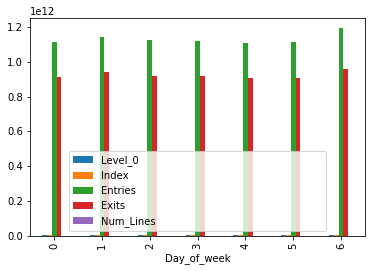

In [58]:

grouped = df.groupby(['Day_of_week']).sum()
grouped.plot(kind='bar')

## Group the Data by Weekend/Weekday and Plot the Sum of the Numeric Columns

In [61]:
grouped = grouped.reset_index()
grouped.head(8)

,level_0,index,Day_of_week,Level_0,Index,Entries,Exits,Num_Lines
0,0,0,0,2783610827,2783610827,1114237052454,911938153513,76110
1,1,1,1,2833413973,2833413973,1143313287046,942230721477,77303
2,2,2,2,2781528032,2781528032,1123655222441,920630864687,75713
3,3,3,3,2817391725,2817391725,1122723988662,920691927110,76607
4,4,4,4,2778112001,2778112001,1110224700078,906799065337,75573
5,5,5,5,2741377942,2741377942,1115661545514,909142081474,74725
6,6,6,6,2792287000,2792287000,1192306179082,959223750461,75306


In [73]:
grouped.columns = [clean(col) for col in grouped.columns]

grouped.columns


Index(['level_0', 'index', 'Day_of_week', 'Level_0', 'Index', 'Entries',
       'Exits', 'Num_Lines', 'IsWeekend'],
      dtype='object')

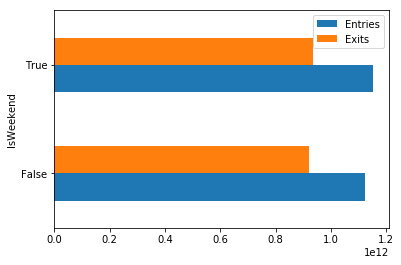

In [75]:
grouped['IsWeekend'] = grouped.Day_of_week.map({0:True,1:False,2:False,3:False,4:False,5:False,6:True})

WkEnd = grouped.groupby("IsWeekend").mean()

WkEnd[['Entries','Exits']].plot(kind='barh')

## Analysis Question: 

What is misleading about the day of week and weekend/weekday charts you just plotted?

In [ ]:
#This lab is written in a confusing way

## Drop a couple of columns

In [77]:
df = df.drop(['C/A', 'Scp'], axis='columns')

df.head()

,Level_0,Index,Linename,Unit,Station,Division,Date,Time,Desc,Entries,Exits,Num_Lines,Day_of_week
124151,124151,124151,23,R027,WALL ST,IRT,2018-08-26,16:00:00,REGULAR,5303744,1237631,2,6
89970,89970,89970,G,R316,FLUSHING AV,IND,2018-08-26,17:00:00,REGULAR,1383522,623058,1,6
144295,144295,144295,45,R043,WALL ST,IRT,2018-08-26,02:00:00,REGULAR,492177,1044935,2,6
41740,41740,41740,A,R173,INWOOD-207 ST,IND,2018-08-26,21:00:00,REGULAR,3624,0,1,6
41739,41739,41739,A,R173,INWOOD-207 ST,IND,2018-08-26,17:00:00,REGULAR,3624,0,1,6


## Summary

Great! You practiced your data cleanup-skills using Pandas.